In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
#cell_data_CD8 = pd.read_csv('cell_meta_data_CD8.csv', index_col = 0)
cell_data_CD8 = pd.read_csv("cell_meta_data_CD8.csv", index_col=0)
cell_data_CD8 = cell_data_CD8[
    (cell_data_CD8['Tissue'] != 'TN') &
    (cell_data_CD8['Tissue'] != 'LN')
]
cell_data_CD8

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,orig.ident,nCount_RNA,nFeature_RNA,Ident,Patient,Treatment,Tissue,MajorCellType,SubCellType,cluster,CD4_score,CD8_score,CD_type_by_cluster,cell_type_true_label,highlight,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,Identifier(Alpha1),CDR3(Alpha1),CDR3_nt(Alpha1),V_gene(Alpha1),J_gene(Alpha1),nRead(Alpha1),nUMI(Alpha1),Length(Alpha1),Full_length(Alpha1),Identifier(Alpha2),CDR3(Alpha2),CDR3_nt(Alpha2),V_gene(Alpha2),J_gene(Alpha2),nRead(Alpha2),nUMI(Alpha2),Length(Alpha2),Full_length(Alpha2),Identifier(Beta1),CDR3(Beta1),CDR3_nt(Beta1),V_gene(Beta1),J_gene(Beta1),nRead(Beta1),nUMI(Beta1),Length(Beta1),Full_length(Beta1),Identifier(Beta2),CDR3(Beta2),CDR3_nt(Beta2),V_gene(Beta2),J_gene(Beta2),nRead(Beta2),nUMI(Beta2),Length(Beta2),Full_length(Beta2)
cell_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CRC01-B-III_AAACGGGCATCGACGC,1780,7.484930,6322,8.751949,44.922493,59.221765,68.570073,79.674154,SeuratProject,6322,1780,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,4,-0.303361,1.712413,CD8,CD8,Other,0.704281,-0.736269,-0.581507,0.459444,-1.107985,1.542989,0.124406,-0.252407,0.833697,False,4,False,False,AAACGGGCATCGACGC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV12-4_TGTGCCAGCAGTTTATTGGGCCGTGGCTATGGCTACA...,CASSLLGRGYGYTF,TGTGCCAGCAGTTTATTGGGCCGTGGCTATGGCTACACCTTC,TRBV12-4,TRBJ1-2,3652.0,11.0,504.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRC01-B-III_AAATGCCGTCATGCCG,1462,7.288244,4649,8.444622,42.030544,55.689396,66.465907,79.307378,SeuratProject,4649,1462,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,4,-0.300942,1.548291,CD8,CD8,Other,1.124061,0.195710,0.015453,0.233068,-0.967517,1.654026,-0.769115,0.120155,0.442455,False,4,False,False,AAATGCCGTCATGCCG-1,TRAV19_TGTGCTCTGGCCCTCGCTCAGGGAGCCCAGAAGCTGGTA...,CALALAQGAQKLVF,TGTGCTCTGGCCCTCGCTCAGGGAGCCCAGAAGCTGGTATTT,TRAV19,TRAJ54,1292.0,5.0,565.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV4-1_TGCGCCAGCAGCCGTCTGGCACAGTCCGCCTACAATGA...,CASSRLAQSAYNEQFF,TGCGCCAGCAGCCGTCTGGCACAGTCCGCCTACAATGAGCAGTTCTTC,TRBV4-1,TRBJ2-1,8294.0,20.0,484.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRC01-B-III_AACGTTGTCACGGTTA,1864,7.531016,6705,8.810758,43.236391,58.314691,67.531693,78.240119,SeuratProject,6705,1864,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,4,-0.212456,0.640026,CD8,CD8,Other,1.383198,0.421165,-0.843779,0.593826,-0.797942,2.031226,1.303250,0.151294,1.667238,False,4,False,False,AACGTTGTCACGGTTA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV11-3_TGTGCCAGCAGCTTAGGGCAGAACTACGAGCAGTACT...,CASSLGQNYEQYF,TGTGCCAGCAGCTTAGGGCAGAACTACGAGCAGTACTTC,TRBV11-3,TRBJ2-7,2564.0,5.0,494.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRC01-B-III_AACTGGTAGTGTACGG,1407,7.249926,5304,8.576405,47.680995,62.537707,71.851433,82.899698,SeuratProject,5304,1407,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,4,-0.213676,1.489181,CD8,CD8,Other,1.456557,-0.220290,-0.988762,-0.602031,-1.093628,1.527874,0.109613,-0.289631,0.818744,False,4,False,False,AACTGGTAGTGTACGG-1,TRAV27_TGTGCAGGAGCTCGGGGTGCTACAAACAAGCTCATCTTT...,CAGARGATNKLIF,TGTGCAGGAGCTCGGGGTGCTACAAACAAGCTCATCTTT,TRAV27,TRAJ32,1210.0,3.0,527.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV9_TGTGCCAGCAGCGTAGGGGACAGCGTATCCTACGAGCAGT...,CASSVGDSVSYEQYF,TGTGCCAGCAGCGTAGGGGACAGCGTATCCTACGAGCAGTACTTC,TRBV9,TRBJ2-7,4630.0,13.0,499.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRC01-B-III_AAGCCGCGTCTTCGTC,1583,7.367709,4551,8.423322,38.716766,51.790815,62.052296,76.203032,SeuratProject,4551,1583,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,4,-0.310524,1.753091,CD8,CD8,Other,0.338113,0.192204,-0.713311,-0.224287,-1.061775,1.201564,1.504591,-

In [2]:
cell_data_CD8["cancer_reactive"] = (
    cell_data_CD8["cancer_reactive_per_cell"] 
  & cell_data_CD8["cancer_reactive_by_cluster"]
)

In [3]:
df_tiss = (
    cell_data_CD8
    .groupby(['Patient','Tissue'])['cancer_reactive']
    .mean()    
    .reset_index(name='prop_reactive')
)
mat = df_tiss.pivot(index='Patient', columns='Tissue', values='prop_reactive')


In [5]:
cell_data_CD8["cancer_reactive"] = (
  cell_data_CD8["cancer_reactive_by_cluster"]
)
df_tiss2 = (
    cell_data_CD8
    .groupby(['Patient','Tissue'])['cancer_reactive']
    .mean()    
    .reset_index(name='prop_reactive')
)
# pivot wide: rows=Patient, cols=Tissue
mat2 = df_tiss2.pivot(index='Patient', columns='Tissue', values='prop_reactive')


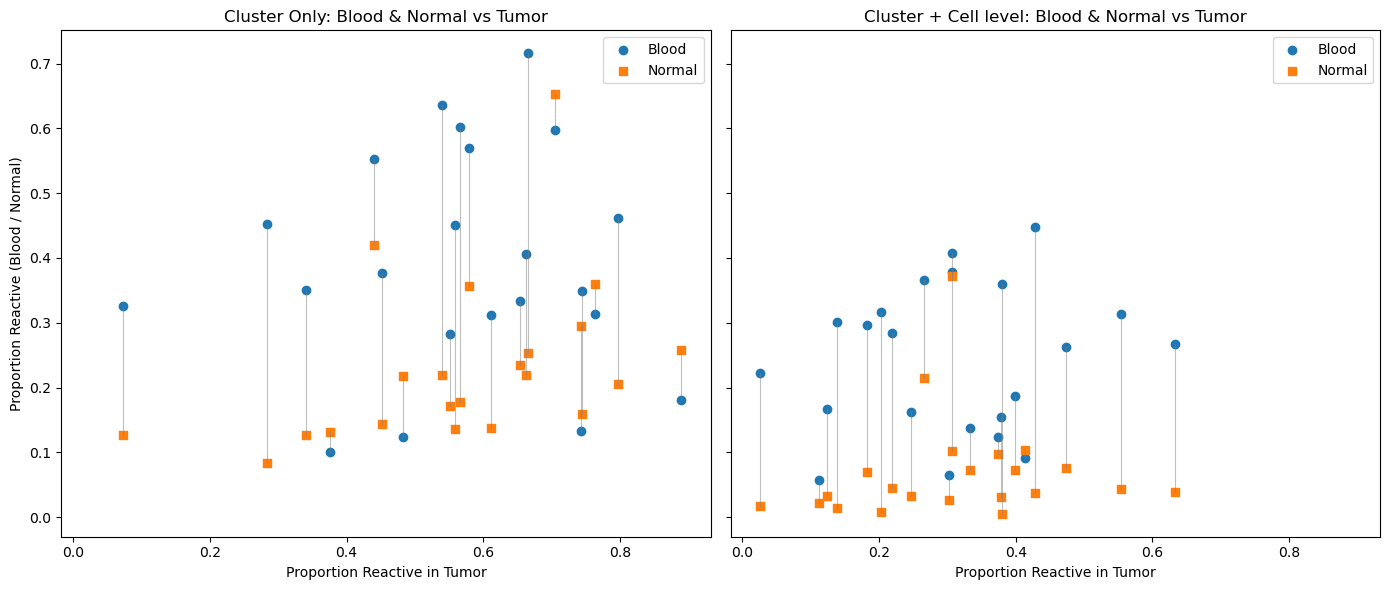

In [6]:
import matplotlib.pyplot as plt

# Create a 1×2 grid of plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# — LEFT PLOT (mat2) —
ax1.scatter(mat2['Tumor'], mat2['Blood'], marker='o', label='Blood')
ax1.scatter(mat2['Tumor'], mat2['Normal'], marker='s', label='Normal')
for _, row in mat2.iterrows():
    ax1.plot([row['Tumor']]*2,
             [row['Blood'], row['Normal']],
             color='gray', alpha=0.5, linewidth=0.8)
ax1.set_xlabel('Proportion Reactive in Tumor')
ax1.set_ylabel('Proportion Reactive (Blood / Normal)')
ax1.set_title('Cluster Only: Blood & Normal vs Tumor')
ax1.legend()

# — RIGHT PLOT (mat) —
ax2.scatter(mat['Tumor'], mat['Blood'], marker='o', label='Blood')
ax2.scatter(mat['Tumor'], mat['Normal'], marker='s', label='Normal')
for _, row in mat.iterrows():
    ax2.plot([row['Tumor']]*2,
             [row['Blood'], row['Normal']],
             color='gray', alpha=0.5, linewidth=0.8)
ax2.set_xlabel('Proportion Reactive in Tumor')
ax2.set_title('Cluster + Cell level: Blood & Normal vs Tumor')
ax2.legend()

# Tidy up
fig.tight_layout()
plt.show()

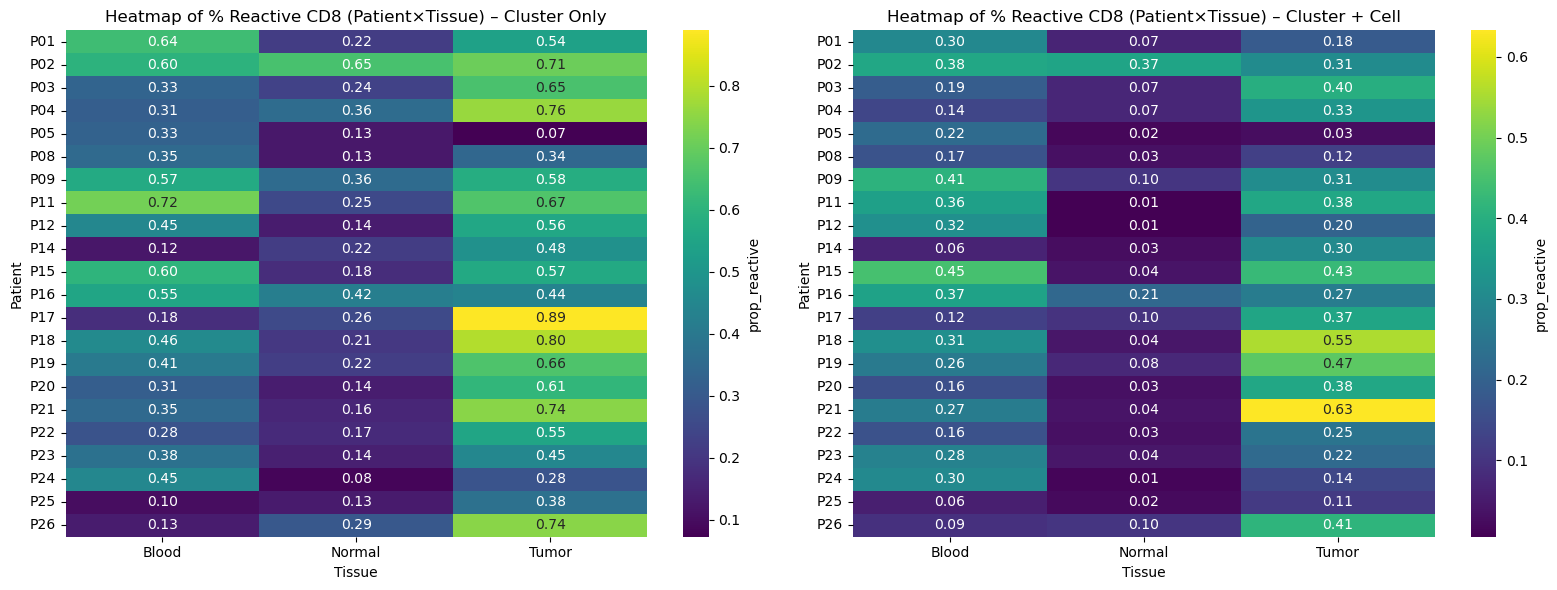

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(
    mat2,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    cbar_kws={'label': 'prop_reactive'},
    ax=axes[0]
)
axes[0].set_title('Heatmap of % Reactive CD8 (Patient×Tissue) – Cluster Only')
axes[0].set_xlabel('Tissue')
axes[0].set_ylabel('Patient')

sns.heatmap(
    mat,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    cbar_kws={'label': 'prop_reactive'},
    ax=axes[1]
)
axes[1].set_title('Heatmap of % Reactive CD8 (Patient×Tissue) – Cluster + Cell')
axes[1].set_xlabel('Tissue')
axes[1].set_ylabel('Patient')

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd

# ── Load/reactive-CD8 tables ──────────────────────────────
# Assume they are in “long” form (columns: Patient, Tissue, prop_reactive);
# if they’re still wide, melt() first.

cluster_only   = df_tiss2
cluster_cell   = df_tiss

# ── Keep the tissue most biologically linked to response ──
# (Tumor is usually the driver, but you can repeat with Blood etc.)
tumor_only     = (cluster_only   .query("Tissue=='Tumor'")
                  .rename(columns={'prop_reactive':'cluster_only'}))
tumor_cplus    = (cluster_cell   .query("Tissue=='Tumor'")
                  .rename(columns={'prop_reactive':'cluster_cell'}))

# ── Merge the two metrics side-by-side ────────────────────
metrics = (tumor_only[['Patient','cluster_only']]
           .merge(tumor_cplus[['Patient','cluster_cell']], on='Patient'))

In [14]:
import pandas as pd

file_path = "1-s2.0-S1535610824002344-mmc2.xlsx"

# Read only the first sheet (index 0), skipping the very first row
df = pd.read_excel(
    file_path,
    sheet_name='scRNA-seq patient meta',  
    header=1        # use row 1 (zero-based) as the column names
)
df

,Patient ID,Age,Gender,Cancer Type,Tumor Location,TNM,Tumor stage,dMMR/pMMR,MSI/MSS,POLE Mutation,TMB (Muts/Mb),Tumor Regression Ratio,Response,TRG status,Treatment Regimen
0,P01,51,Male,CRC,Descending colon,T4bN0M0,II,dMMR,MSS,Yes,Not avaliable,0.5648,CR,TRG0,Pembrolizumab
1,P02,56,Male,CRC,Ascending colon,T4bN2M1,IV,pMMR,MSS,No,3.58,-0.0196,SD,TRG3,Pembrolizumab
2,P03,66,Male,CRC,Low rectum,T3bN2aM0,III,pMMR,MSS,No,Not avaliable,0.4541,PR,TRG2,Pembrolizumab + CapeOx
3,P04,47,Female,CRC,Ascending colon,T4aN+M0,III,dMMR,MSI,No,487,0.9180,CR,TRG0,Pembrolizumab
4,P05,63,Female,CRC,Low rectum,T3N+M0,III,pMMR,MSS,No,3.05,0.3333,PR,TRG2,Sintilimab+ CapeOx
5,P08,52,Male,CRC,Low rectum,T3N1M0,III,dMMR,MSI,No,121.64,0.8813,CR,TRG0,Pembrolizumab
6,P09,64,Male,CRC,Low rectum,T3bN2b,III,pMMR,MSS,No,4.75,0.9156,CR,TRG0,Sintilimab+ CapeOx
7,P11,65,Male,Duodenal carcinoma,Duodenum,T3N0M0,II,dMMR,MSI,No,1.78,1.0000,CR,TRG0,Pembrolizumab
8,P12,60,Male,CRC,Descending colon,T4bN2bM0,III,dMMR,MSI,No,114.72,0.0090,CR,TRG0,Pembrolizumab
9,P14,58,Male,CRC,Low rectum,T3N2bM0,III,pMMR,MSS,No,Not avaliable,0.2272,PR,TRG2,Sintilimab + CapeOx


In [16]:
clin = df.rename(columns={'Patient ID':'Patient'})  # harmonise key

df = metrics.merge(clin, on='Patient')

In [17]:
from scipy.stats import spearmanr

for metric in ['cluster_only', 'cluster_cell']:
    rho, p = spearmanr(df[metric], df['Tumor Regression Ratio'])
    print(f"{metric:14s}  ρ = {rho:5.2f},  p = {p:6.4f}")

cluster_only    ρ =  0.22,  p = 0.3311
cluster_cell    ρ =  0.25,  p = 0.2593


In [24]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import LeaveOneOut

df['CR'] = (df['Response']=='CR').astype(int)

X1 = sm.add_constant(df['cluster_only'])
X2 = sm.add_constant(df['cluster_cell'])

model1 = sm.Logit(df['CR'], X1).fit(disp=0)
model2 = sm.Logit(df['CR'], X2).fit(disp=0)

print(model1.summary().tables[1])
print(model2.summary().tables[1])
print(f"Cluster-only LR χ² = {model1.llr:6.3f}, p = {model1.llr_pvalue:6.4f}")
print(f"Cluster+cell LR χ² = {model2.llr:6.3f}, p = {model2.llr_pvalue:6.4f}")

                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5661      1.526     -1.026      0.305      -4.557       1.424
cluster_only     3.0904      2.575      1.200      0.230      -1.956       8.137
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5454      1.030     -0.530      0.596      -2.564       1.473
cluster_cell     2.3741      3.072      0.773      0.440      -3.646       8.394
Cluster-only LR χ² =  1.612, p = 0.2042
Cluster+cell LR χ² =  0.622, p = 0.4305


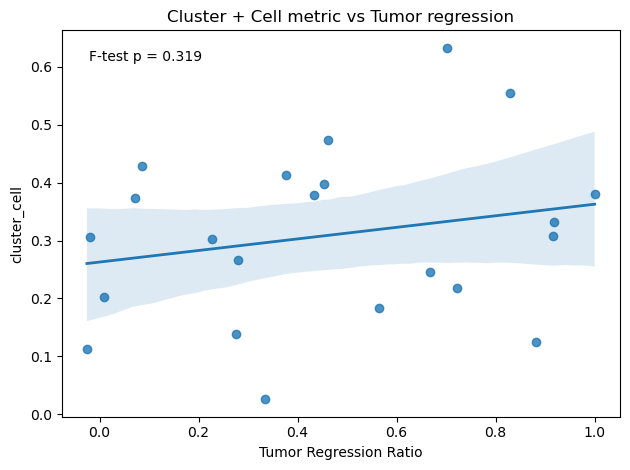

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

X = sm.add_constant(df['Tumor Regression Ratio'])   # add intercept
y = df['cluster_cell']
ols = sm.OLS(y, X).fit()

# ── Make the regplot ────────────────────────────────────────
ax = sns.regplot(data=df,
                 x='Tumor Regression Ratio',
                 y='cluster_cell',
                 line_kws={'lw':2})

# ── Annotate the figure with the F-test p-value ─────────────
p_val = ols.f_pvalue            # overall model p (F-statistic)
ax.annotate(f"F-test p = {p_val:.3g}",
            xy=(0.05, 0.95), xycoords='axes fraction',
            ha='left', va='top', fontsize=10)

ax.set_title('Cluster + Cell metric vs Tumor regression')
plt.tight_layout()
plt.show()


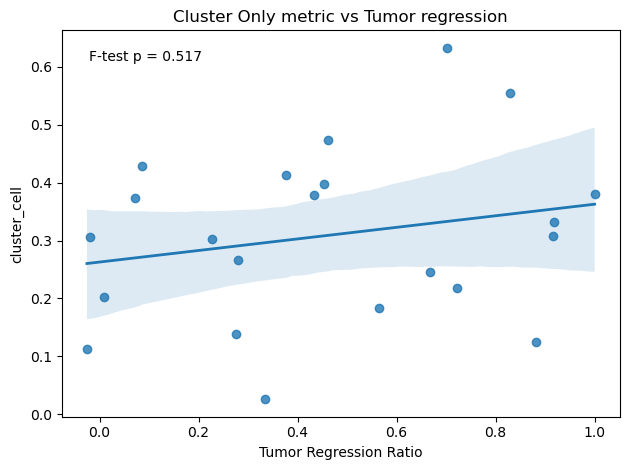

In [27]:
X = sm.add_constant(df['Tumor Regression Ratio'])   # add intercept
y = df['cluster_only']
ols = sm.OLS(y, X).fit()

# ── Make the regplot ────────────────────────────────────────
ax = sns.regplot(data=df,
                 x='Tumor Regression Ratio',
                 y='cluster_cell',
                 line_kws={'lw':2})

# ── Annotate the figure with the F-test p-value ─────────────
p_val = ols.f_pvalue            # overall model p (F-statistic)
ax.annotate(f"F-test p = {p_val:.3g}",
            xy=(0.05, 0.95), xycoords='axes fraction',
            ha='left', va='top', fontsize=10)

ax.set_title('Cluster Only metric vs Tumor regression')
plt.tight_layout()
plt.show()